# Treegetval
Illustrates how to retrieve  TTree variables in arrays.

This example:
  - creates a simple TTree,
  - generates TTree variables thanks to the `Draw` method with `goff` option,
  - retrieves some of them in arrays thanks to `GetVal`,
  - generates and draw graphs with these arrays.

The option `goff` in `TTree::Draw` behaves like any other drawing option except
that, at the end, no graphics is produced ( `goff`= graphics off). This allows
to generate as many TTree variables as needed. All the graphics options
(except `para` and `candle`) are limited to four variables only. And `para`
and `candle` need at least two variables.

Note that by default TTree::Draw creates the arrays obtained
with GetVal with a length corresponding to the parameter `fEstimate`.
By default fEstimate=1000000 and can be modified
via TTree::SetEstimate. To keep in memory all the results use:
```cpp
  tree->SetEstimate(-1);
```
SetEstimate should be called if the expected number of selected rows
is greater than 1000000.




**Author:** Olivier Couet  
<i><small>This notebook tutorial was automatically generated with <a href= "https://github.com/root-project/root/blob/master/documentation/doxygen/converttonotebook.py">ROOTBOOK-izer</a> from the macro found in the ROOT repository  on Thursday, August 29, 2019 at 03:58 AM.</small></i>

Create a simple ttree with 5 branches

In [1]:
Int_t run, evt;
Float_t x,y,z;
TTree *T = new TTree("T","test friend trees");
T->Branch("Run",&run,"Run/I");
T->Branch("Event",&evt,"Event/I");
T->Branch("x",&x,"x/F");
T->Branch("y",&y,"y/F");
T->Branch("z",&z,"z/F");
TRandom r;
for (Int_t i=0;i<10000;i++) {
   if (i < 5000) run = 1;
   else          run = 2;
   evt = i;
   x = r.Gaus(10,1);
   y = r.Gaus(20,2);
   z = r.Landau(2,1);
   T->Fill();
}

Draw with option goff and generate seven variables

In [2]:
Int_t n = T->Draw("x:y:z:Run:Event:sin(x):cos(x)","Run==1","goff");
printf("The arrays' dimension is %d\n",n);

The arrays' dimension is 5000


Retrieve variables 0, 5 et 6

In [3]:
Double_t *vx  = T->GetVal(0);
Double_t *vxs = T->GetVal(5);
Double_t *vxc = T->GetVal(6);

Create and draw graphs

In [4]:
TGraph *gs = new TGraph(n,vx,vxs);
TGraph *gc = new TGraph(n,vx,vxc);
gs->Draw("ap");
gc->Draw("p");

Info in <TCanvas::MakeDefCanvas>:  created default TCanvas with name c1


Draw all canvases 

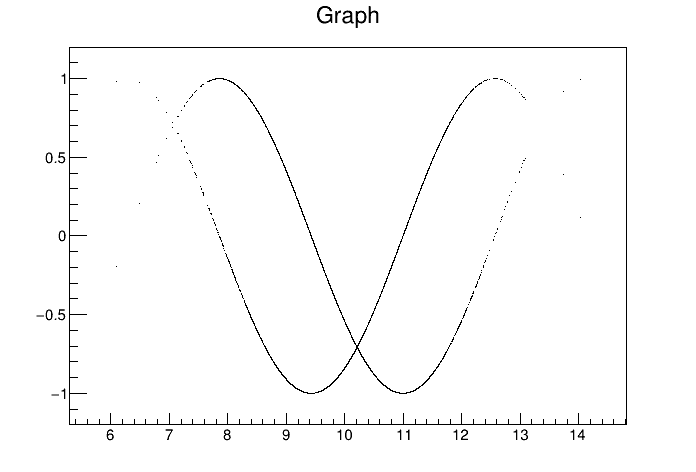

In [5]:
gROOT->GetListOfCanvases()->Draw()